# Script permettant de visualiser la répartition du nombre d'erreur en fonction du primate
Input: fichier type [nb nom_primate]. Un nombre par primate
Output: graph matplotlib  

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
number_file = pd.read_csv("../../data/mismatch-analysis/number_seq_per_primate.txt", sep="\t", header=None, names=["number", "primate"])
normalize_file = pd.read_csv("../../data/mismatch-analysis/number_seq_per_primate_all.txt", sep="\t", header=None, names=["number", "primate"])
number_file = number_file.merge(normalize_file, on="primate", how="inner")
number_file["Errror_per_seq"] = number_file[["number_x"]].div(number_file["number_y"], axis=0)

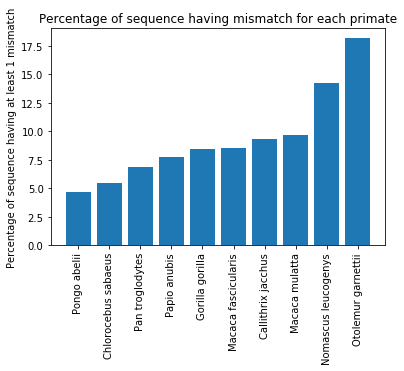

In [5]:
number_file.sort_values(by=['Errror_per_seq'], inplace=True)
index = number_file["primate"].to_list()
value = number_file["Errror_per_seq"].to_list()
value = [x*100 for x in value]
plt.bar(index, value)
plt.title("Percentage of sequence having mismatch for each primate")
plt.ylabel("Percentage of sequence having at least 1 mismatch")
plt.xticks(rotation=90)
plt.savefig("../../results/figures/percenage-mistmatch-error-per-primate.png", dpi=300, bbox_inches='tight')
plt.show()

([<matplotlib.axis.XTick at 0x7f63f6ac2450>,
 <a list of 11 Text xticklabel objects>)

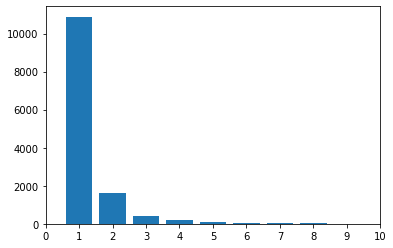

In [6]:
error_file = pd.read_csv("../../data/mismatch-analysis/uniprot_errors_type3.txt", sep=" ", header=None)
mismatch_per_seq = error_file[2].value_counts()
aaa = mismatch_per_seq.value_counts()
plt.bar(aaa.index, aaa.values)
plt.xlim(0,10)
plt.xticks(range(0,11))